# PCA

In [40]:
import pandas as pd
import numpy as np

names = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
         'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
         'OD280/OD315 of diluted wines','Proline']

df = pd.read_csv('wine.csv',header = None, names = names)
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [41]:
X = df.loc[:,:].values
y = df.index.values

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [48]:
## PCA降維

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_pca,y_train)
y_pred = lr.predict(X_test_pca)
print('Test Accuracy: %.3f' % lr.score(X_test_pca,y_test))

Test Accuracy: 0.981


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [52]:
def plot_decision_regions(x,y,classifier,test_idx=None,resolution=0.02):
    
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0],
                   y=x[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        

    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        
        plt.scatter(x_test[:, 0],
                   x_test[:, 1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set')

In [57]:
X_std_all = np.vstack((X_train_std, X_test_std))
y_all = np.hstack((y_train, y_test))

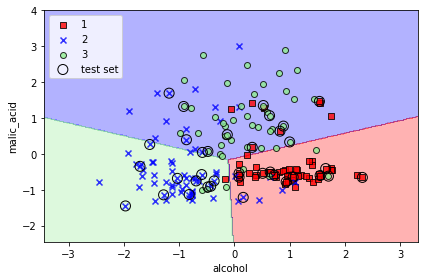

In [58]:
plot_decision_regions(X_std_all, y_all, classifier=lr ,test_idx=range(142,178))
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

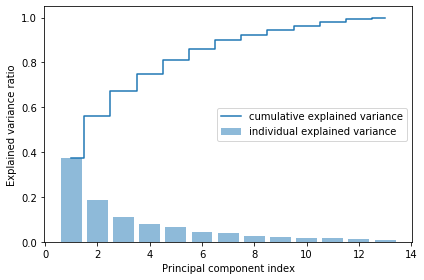

In [56]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

plt.bar(range(1,14), var_ratio, alpha = 0.5, align = 'center',
        label = 'individual explained variance')
plt.step(range(1,14), cum_var_ratio, where = 'mid',
         label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# LDA

In [59]:
import pandas as pd
import numpy as np

names = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
         'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
         'OD280/OD315 of diluted wines','Proline']

df = pd.read_csv('wine.csv',header = None, names = names)
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [60]:
X = df.loc[:,:].values
y = df.index.values

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [62]:
## LDA降維

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std,y_train)
X_test_lda = lda.transform(X_test_std)

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_lda,y_train)
y_pred = lr.predict(X_test_lda)
print('Test Accuracy: %.3f' % lr.score(X_test_lda,y_test))

Test Accuracy: 1.000


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [64]:
X_std_all = np.vstack((X_train_std, X_test_std))
y_all = np.hstack((y_train, y_test))

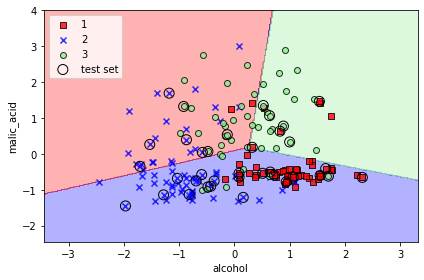

In [65]:
plot_decision_regions(X_std_all, y_all, classifier=lr ,test_idx=range(142,178))
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

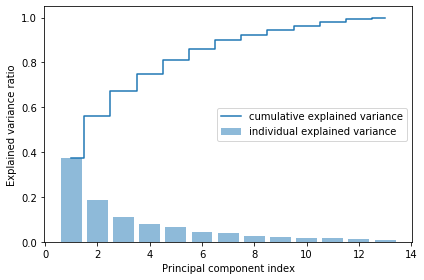

In [66]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

plt.bar(range(1,14), var_ratio, alpha = 0.5, align = 'center',
        label = 'individual explained variance')
plt.step(range(1,14), cum_var_ratio, where = 'mid',
         label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()